# Proyek Analisis Data: Bike Sharing 
### Nama : Nairsya Syauqi Ghasila
### Email : nairsyasyauqighasila@gmail.com
### ID Dicoding : MC131D5X1929

# Menentukan Pertanyaan Bisnis
- Bagaimana performa bisnis dalam beberapa bulan terakhir?
- Kapan waktu dengan jumlah penyewaan terbanyak dan tersedikit dalam sehari?

# Import semua Library yang digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

### Gathering Data

In [8]:
hours_df = pd.read_csv("data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

In [10]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan hasil tersebut, jumlah datanya telah lengkap sehingga tidak ada missing value di dalamnya.Namun, terdapat kesalahn tipe data untuk kolom dteday yang harusnya direpresentasikan sebagai tipe data datetime, bukan object.

In [11]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [12]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())

Jumlah duplikasi:  0


Dapat disimpulkan bahwa tidak ada missing value, inaccurate 
dan duplicate value, hanya saja ada kesalahan tipe data.

### Cleaning Data

In [13]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [14]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Dari hasil tersebut, bisa dilihat bahwa tipe data dteday telah berubah menjadi datetime

# Exploratory Data Analysis

In [15]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [17]:
hours_df.groupby(by="dteday").cnt.sum().sort_values(ascending=False)

dteday
2012-09-15    8714
2012-09-29    8555
2012-09-22    8395
2012-03-23    8362
2012-05-19    8294
              ... 
2011-03-06     605
2011-01-26     506
2012-12-26     441
2011-01-27     431
2012-10-29      22
Name: cnt, Length: 731, dtype: int64

In [18]:
hours_df.groupby(by="mnth").cnt.sum().sort_values(ascending=False)

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

In [19]:
hours_df.groupby(by="season").cnt.sum().sort_values(ascending=False)

season
3    1061129
2     918589
4     841613
1     471348
Name: cnt, dtype: int64

In [20]:
hours_df.groupby(by="hr").cnt.sum().sort_values(ascending=False)

hr
17    336860
18    309772
8     261001
16    227748
19    226789
13    184919
12    184414
15    183149
14    175652
20    164550
9     159438
7     154171
11    151320
10    126257
21    125445
22     95612
23     63941
6      55132
0      39130
1      24164
2      16352
5      14261
3       8174
4       4428
Name: cnt, dtype: int64

# Visualization & Explanatory Analysis

### Bagaimana performa bisnis dalam beberapa bulan terakhir?

In [27]:
# Resampling data per bulan ('M') berdasarkan 'dteday'
monthly_rentals_df = hours_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum"
})

# Ubah index menjadi nama bulan
monthly_rentals_df.index = monthly_rentals_df.index.strftime('%B')

# Reset index agar menjadi DataFrame yang lebih rapi
monthly_rentals_df = monthly_rentals_df.reset_index()

# Ubah nama kolom agar lebih deskriptif
monthly_rentals_df.rename(columns={
    "casual": "total_casual",
    "registered": "total_registered"
}, inplace=True)

# Tampilkan hasil
print(monthly_rentals_df.head())

     dteday  total_casual  total_registered
0   January          3073             35116
1  February          6242             41973
2     March         12826             51219
3     April         22346             72524
4       May         31050            104771


C:\Users\nairs\AppData\Local\Temp\ipykernel_20532\2248267063.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rentals_df = hours_df.resample(rule='M', on='dteday').agg({


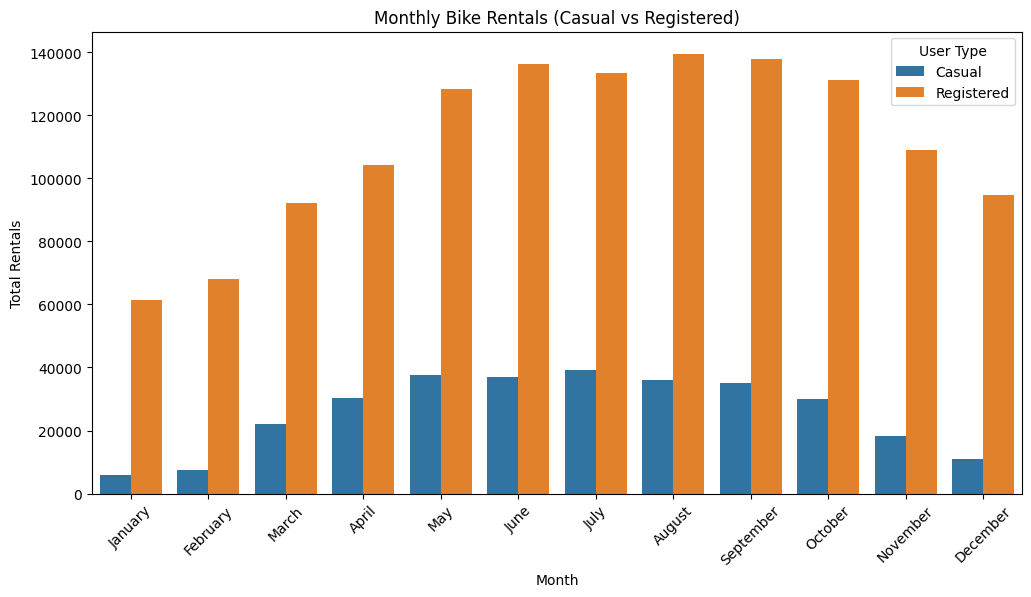

In [33]:
monthly_rentals_long = monthly_rentals_df.melt(
    id_vars=["dteday"],  # Nama bulan tetap sebagai index
    value_vars=["total_casual", "total_registered"],  # Kolom yang akan dipisah
    var_name="user_type",  # Nama kategori baru
    value_name="total_rentals"  # Nilai dari jumlah sewa
)

# Buat clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=monthly_rentals_long, 
    x="dteday", 
    y="total_rentals", 
    hue="user_type",  # Warna berbeda untuk casual & registered
    errorbar=None
)

# Atur tampilan plot
plt.title("Monthly Bike Rentals (Casual vs Registered)")
plt.xlabel("Month")
plt.ylabel("Total Rentals")
plt.xticks(rotation=45)  # Rotasi agar nama bulan terbaca
plt.legend(title="User Type", labels=["Casual", "Registered"])

# Tampilkan plot
plt.show()

### Kapan waktu dengan jumlah penyewaan terbanyak dan tersedikit dalam sehari?

In [40]:
date_order_df = hours_df.groupby("hr").cnt.sum().sort_values(ascending=False).reset_index()
date_order_df.head(23)

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


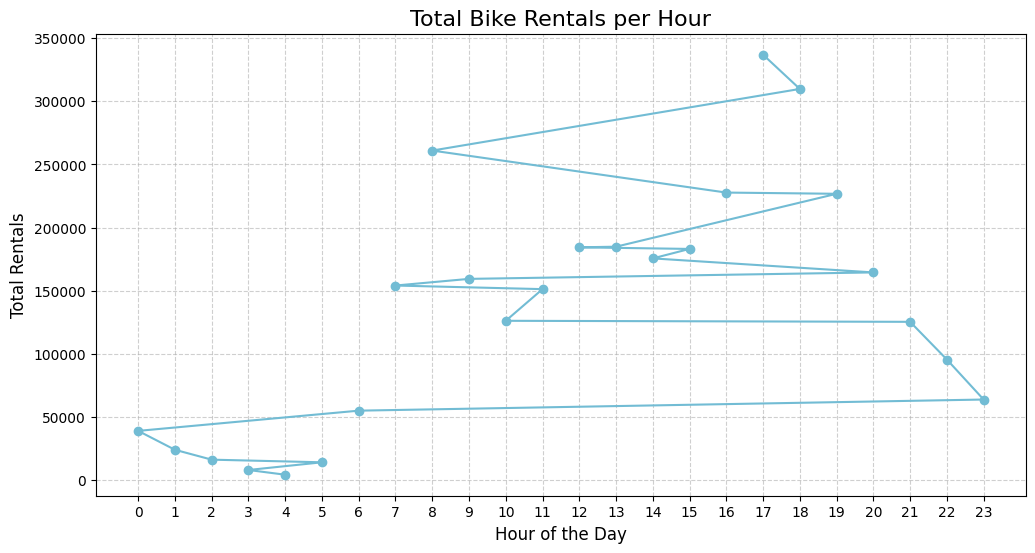

In [41]:
plt.figure(figsize=(12, 6))

# Plot line chart
plt.plot(date_order_df["hr"], date_order_df["cnt"], marker='o', linestyle='-', color="#72BCD4")

# Atur judul dan label
plt.title("Total Bike Rentals per Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Total Rentals", fontsize=12)
plt.xticks(range(0, 24), fontsize=10)  # Pastikan semua jam terlihat
plt.yticks(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)

# Tampilkan plot
plt.show()
